# Convnets for text recognition
___

*Source: [Chollet et al., Deep Learning With R](https://www.amazon.com/Deep-Learning-R-Francois-Chollet/dp/161729554X) *

___


In [3]:
source('src/lib.r')

The same properties that make convnets excel at computer vision also make them highly relevant to sequence processing. **Time can be treated as a spatial dimension, like the height or width of a 2D image.** Such 1D convnets can be competitive on certain sequence-processing problems.

The convolution layers we introduced previously were 2D convolutions, extracting 2D patches from image tensors and applying an identical transformation to every patch. In the same way, you can use 1D convolutions, extracting local 1D patches (subsequences)
from sequences

<img src="fig/1d_conv.PNG" width="400">


Recently, 1D convnets, typically used with dilated kernels (dilated means the kernel has a long stride, i.e. it "jumps" along the input instead of sliding), have been used with great success for **audio generation** and **machine translation**.

In [4]:
max_features <- 10000
max_len <- 500

imdb = dataset_imdb(num_words = max_features)
c(c(x_train, y_train), c(x_test, y_test)) %<-% imdb

x_train = pad_sequences(x_train, maxlen = max_len)
x_test = pad_sequences(x_test, maxlen = max_len)

1D convnets are structured in the same way as their 2D counterparts: they consist of a stack of $\texttt{layer}$\_$\texttt{conv}$\_$\texttt{1d}$ $\texttt{layer}$\_$\texttt{max}$\_$\texttt{pooling}$\_$\texttt{1d}$, and ending in either a global pooling layer or a $\texttt{layer}$\_$\texttt{flatten}$, that turn the 3D outputs into 2D outputs, allowing you to add one or more dense layers to the model for classification or regression.
One difference, though, is the fact that **you can afford to use larger convolution windows with 1D convnets**. With a 2D convolution layer, a 3 × 3 convolution window contains 3 * 3 = 9 feature vectors; but with a 1D convolution layer, a convolution window of size 3 contains only 3 feature vectors. You can thus easily afford 1D convolution windows of size 7 or 9.

In [7]:
model_cnn_1d = keras_model_sequential() %>%
    layer_embedding(input_dim = max_features,
                    output_dim = 128,
                    input_length = max_len) %>%
    layer_conv_1d(filters = 32,
                  kernel_size = 7,
                  activation = "relu") %>%
    layer_max_pooling_1d(pool_size = 5) %>%
    layer_conv_1d(filters = 32,
                  kernel_size = 7,
                  activation = "relu") %>%
    layer_global_max_pooling_1d() %>%
    layer_dense(units = 1)

summary(model_cnn_1d)

________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
embedding_1 (Embedding)             (None, 500, 128)                1280000     
________________________________________________________________________________
conv1d_1 (Conv1D)                   (None, 494, 32)                 28704       
________________________________________________________________________________
max_pooling1d_1 (MaxPooling1D)      (None, 98, 32)                  0           
________________________________________________________________________________
conv1d_2 (Conv1D)                   (None, 92, 32)                  7200        
________________________________________________________________________________
global_max_pooling1d_1 (GlobalMaxPo (None, 32)                      0           
________________________________________________________________________________
dense_1 (Dense)             

In [8]:
model_cnn_1d %>% compile(
    optimizer = optimizer_rmsprop(lr = 1e-4), # manually set a very small LR
    loss = "binary_crossentropy", # binary loss function since the problem is dichotomic
    metrics = c("acc") # accuracy metric is fine
)


(history = model_cnn_1d %>% fit(
    x_train,
    y_train,
    epochs = 10,
    batch_size = 128,
    validation_split = 0.2
))

model_cnn_1d$save('data/imdb_cnn.h5')
model_cnn_1d$save_weights('data/imdb_cnn_w.h5')
saveRDS(history, 'data/history.rds')

Trained on 20,000 samples, validated on 5,000 samples (batch_size=128, epochs=10)
Final epoch (plot to see history):
val_loss: 0.4934
 val_acc: 0.756
    loss: 0.2284
     acc: 0.8084 

In [15]:
history = readRDS('data/history.rds')

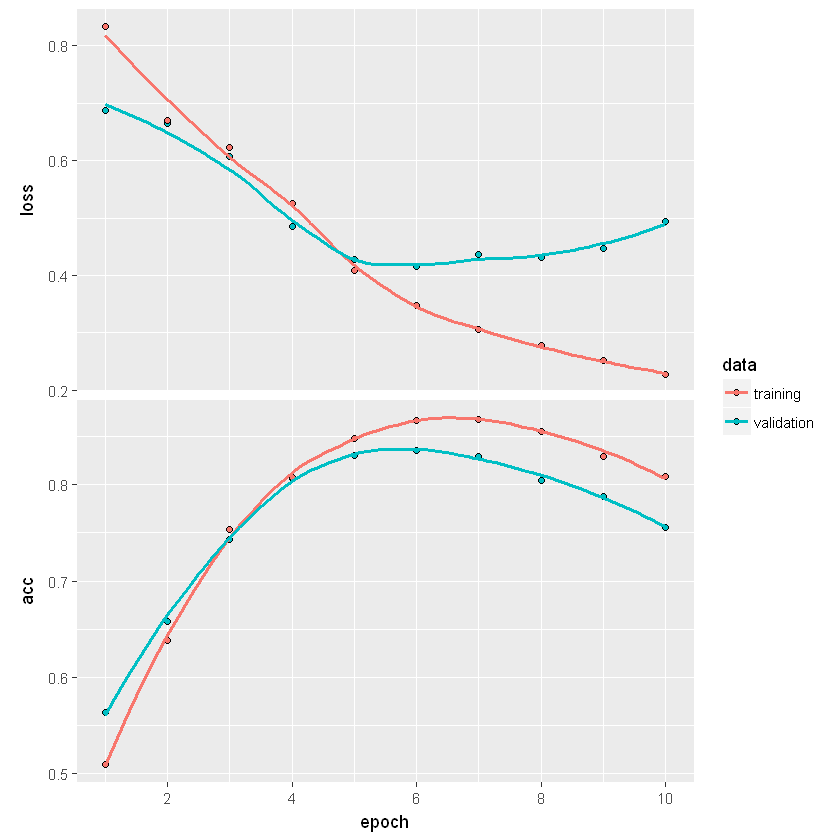

In [16]:
history %>% plot

In [5]:
model_cnn_1d = load_model_hdf5('data/imdb_cnn.h5')
model_cnn_1d$load_weights('data/imdb_cnn_w.h5')

In [6]:
model_cnn_1d %>% evaluate(x_test, y_test)

$loss
[1] 0.4938606

$acc
[1] 0.74912